Dataset Shape: (252000, 65)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 65 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Income                                252000 non-null  int64  
 1   Age                                   252000 non-null  int64  
 2   Experience                            252000 non-null  int64  
 3   Married.Single                        252000 non-null  int64  
 4   House_Ownership                       252000 non-null  int64  
 5   Car_Ownership                         252000 non-null  int64  
 6   Profession                            252000 non-null  object 
 7   STATE                                 252000 non-null  object 
 8   CURRENT_JOB_YRS                       252000 non-null  int64  
 9   CURRENT_HOUSE_YRS                     252000 non-null  int64  
 10  Risk_Flag                 

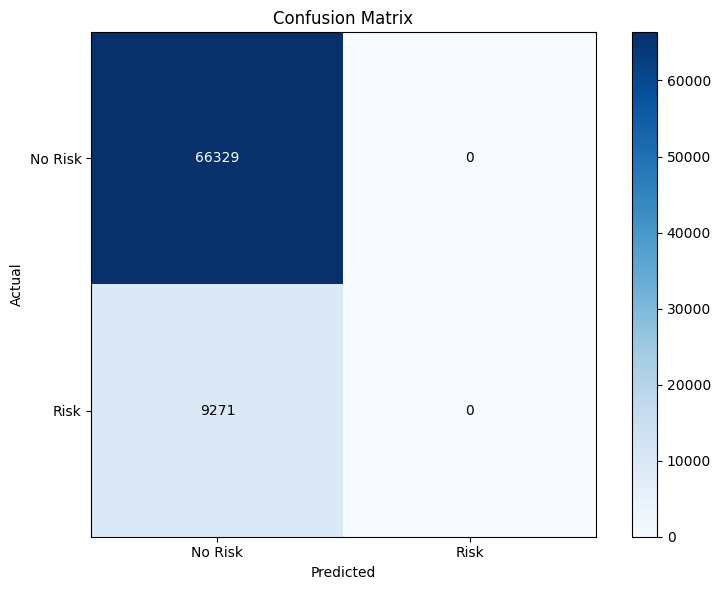

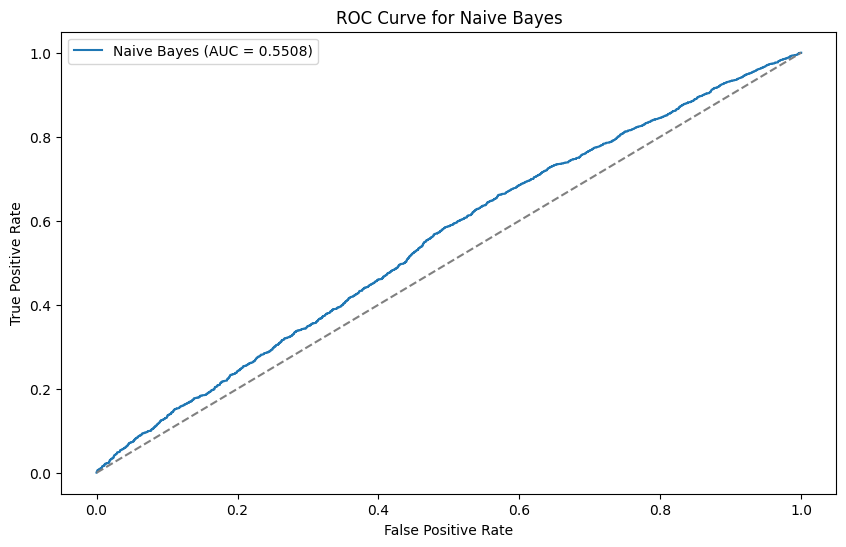

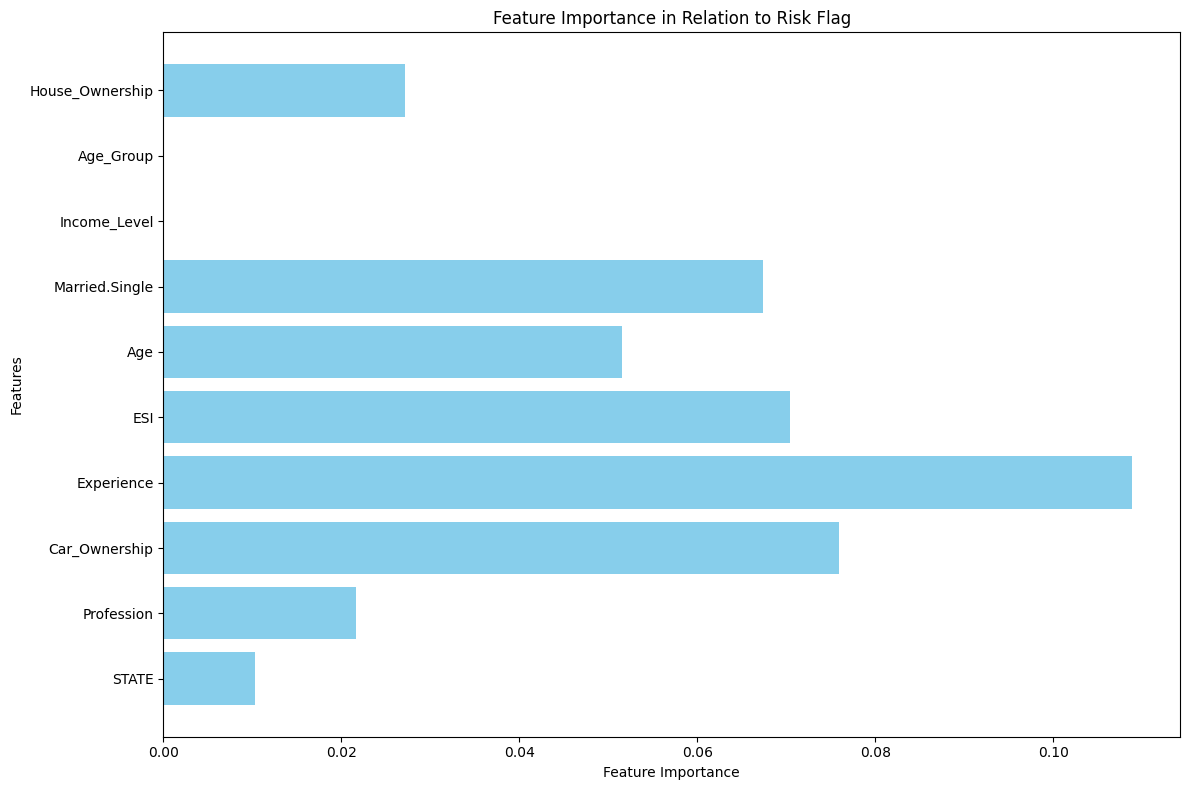

Top Features by Importance:
           Feature  Importance
3       Experience    0.108811
2    Car_Ownership    0.075946
4              ESI    0.070369
6   Married.Single    0.067436
5              Age    0.051553
9  House_Ownership    0.027133
1       Profession    0.021675
0            STATE    0.010325
7     Income_Level    0.000000
8        Age_Group    0.000000


In [26]:
# Iteration 1 - Naïve Bayes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('cleanLoanData.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Dataset Info:")
print(data.info())

# Combine all STATE and Profession into single features
# Encoding STATE and Profession into numerical categories
le_state = LabelEncoder()
le_profession = LabelEncoder()

data['STATE'] = le_state.fit_transform(data['STATE'])
data['Profession'] = le_profession.fit_transform(data['Profession'])

# Retain relevant features along with Risk_Flag
columns_to_keep = [
    'STATE', 'Profession', 'Car_Ownership', 'Experience', 'ESI', 'Age', 
    'Married.Single', 'Income_Level', 'Age_Group', 'House_Ownership', 'Risk_Flag'
]
data = data[columns_to_keep]

# Ensure all features in X are numeric
X = data.drop('Risk_Flag', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert strings to NaN if present
X.fillna(0, inplace=True)  # Replace NaN values with 0

y = data['Risk_Flag']

# Train-test split with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train Naive Bayes
print("Training Naive Bayes...")
nb_model.fit(X_train, y_train)
print("Naive Bayes trained.")

# Predictions
nb_probs = nb_model.predict_proba(X_test)[:, 1]
nb_preds = nb_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, y_probs):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=1),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_probs)
    }
    return metrics

nb_metrics = evaluate_model(y_test, nb_preds, nb_probs)

# Print metrics
print("Naive Bayes Metrics:")
for metric, value in nb_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.yticks([0, 1], ['No Risk', 'Risk'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Annotate confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.tight_layout()
plt.show()

# ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(10, 6))
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.legend()
plt.show()

# Feature Analysis
feature_names = X.columns
feature_importances = abs(nb_model.theta_[1] - nb_model.theta_[0])  # Difference between means for each class

# Plot feature relationships
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Relation to Risk Flag")
plt.tight_layout()
plt.show()

# Summary Table of Features and Risk Flag Relationships
feature_analysis = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(feature_analysis.head(10))

Dataset Shape: (252000, 65)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 65 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Income                                252000 non-null  int64  
 1   Age                                   252000 non-null  int64  
 2   Experience                            252000 non-null  int64  
 3   Married.Single                        252000 non-null  int64  
 4   House_Ownership                       252000 non-null  int64  
 5   Car_Ownership                         252000 non-null  int64  
 6   Profession                            252000 non-null  object 
 7   STATE                                 252000 non-null  object 
 8   CURRENT_JOB_YRS                       252000 non-null  int64  
 9   CURRENT_HOUSE_YRS                     252000 non-null  int64  
 10  Risk_Flag                 

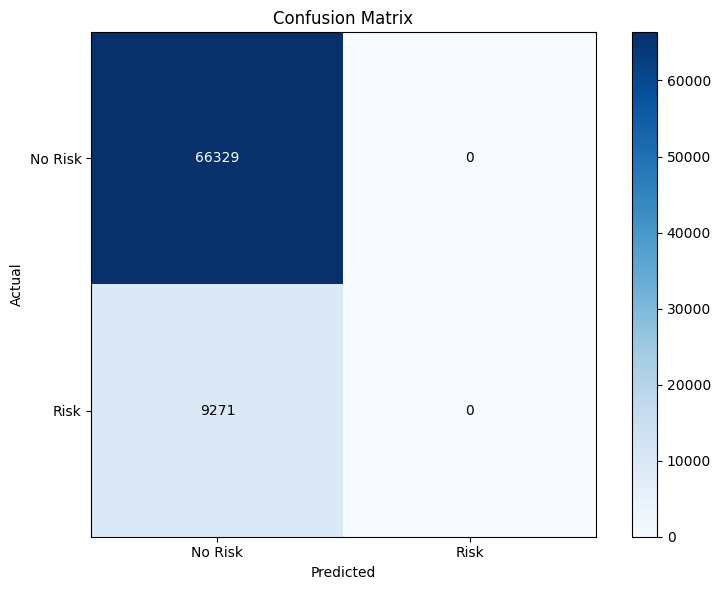

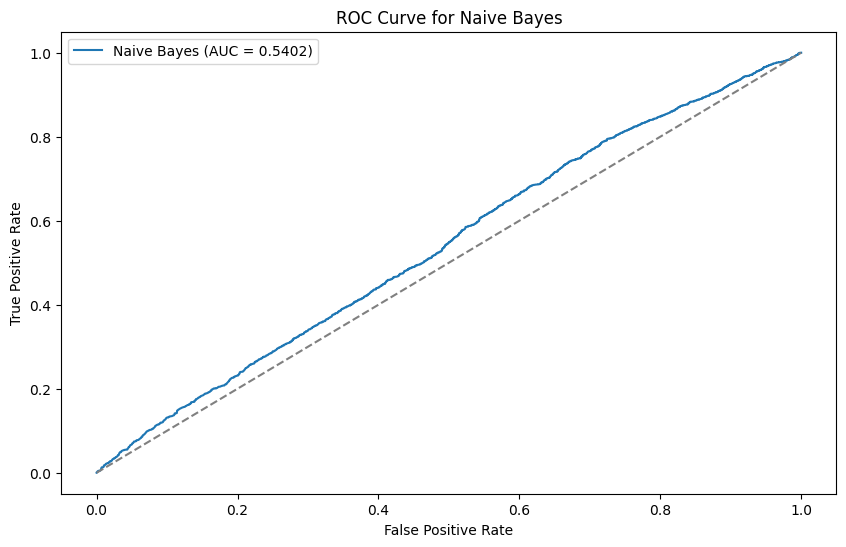

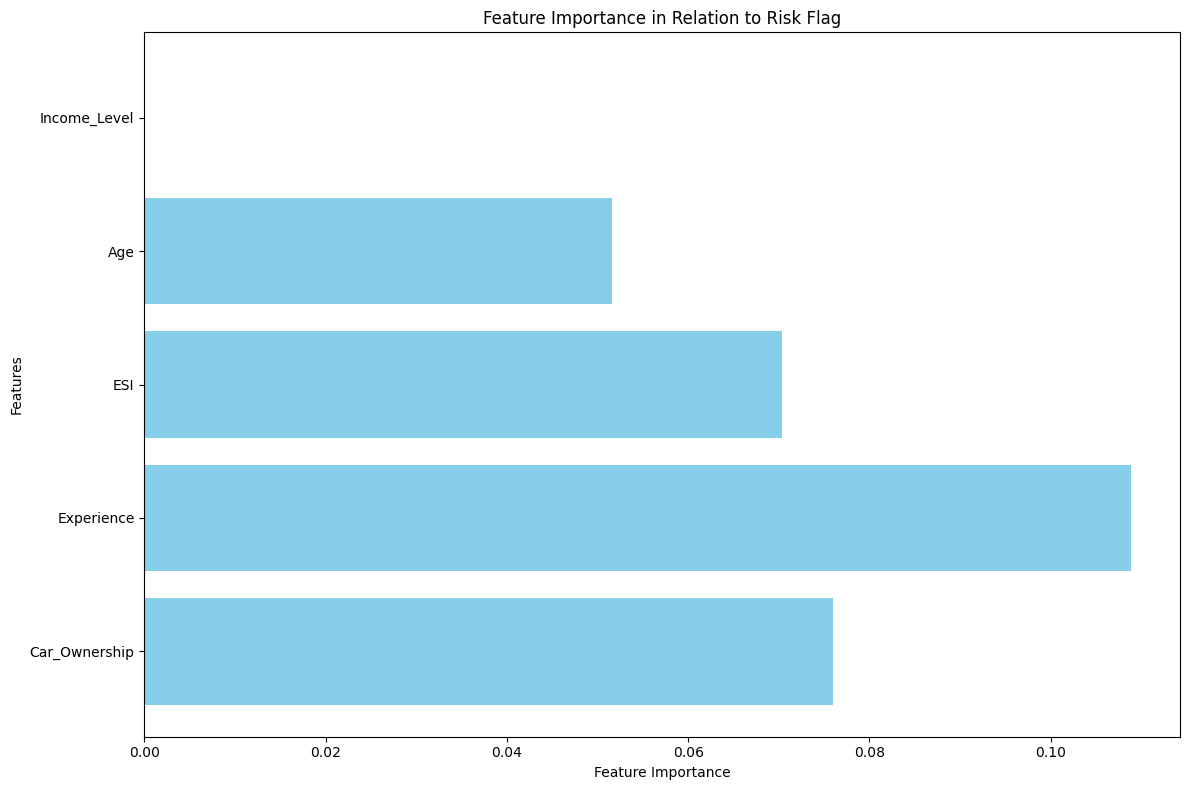

Top Features by Importance:
         Feature  Importance
1     Experience    0.108811
0  Car_Ownership    0.075946
2            ESI    0.070369
3            Age    0.051553
4   Income_Level    0.000000


In [27]:
# Iteration 2 - Naïve Bayes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('cleanLoanData.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Dataset Info:")
print(data.info())

# Retain only numerical features along with Risk_Flag
columns_to_keep = [
    'Car_Ownership', 'Experience', 'ESI', 'Age', 'Income_Level', 'Risk_Flag'
]
data = data[columns_to_keep]

# Ensure all features in X are numeric
X = data.drop('Risk_Flag', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert strings to NaN if present
X.fillna(0, inplace=True)  # Replace NaN values with 0

y = data['Risk_Flag']

# Train-test split with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train Naive Bayes
print("Training Naive Bayes...")
nb_model.fit(X_train, y_train)
print("Naive Bayes trained.")

# Predictions
nb_probs = nb_model.predict_proba(X_test)[:, 1]
nb_preds = nb_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, y_probs):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=1),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_probs)
    }
    return metrics

nb_metrics = evaluate_model(y_test, nb_preds, nb_probs)

# Print metrics
print("Naive Bayes Metrics:")
for metric, value in nb_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.yticks([0, 1], ['No Risk', 'Risk'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Annotate confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.tight_layout()
plt.show()

# ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(10, 6))
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.legend()
plt.show()

# Feature Analysis
feature_names = X.columns
feature_importances = abs(nb_model.theta_[1] - nb_model.theta_[0])  # Difference between means for each class

# Plot feature relationships
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Relation to Risk Flag")
plt.tight_layout()
plt.show()

# Summary Table of Features and Risk Flag Relationships
feature_analysis = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(feature_analysis.head(10))



Dataset Shape: (252000, 65)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 65 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Income                                252000 non-null  int64  
 1   Age                                   252000 non-null  int64  
 2   Experience                            252000 non-null  int64  
 3   Married.Single                        252000 non-null  int64  
 4   House_Ownership                       252000 non-null  int64  
 5   Car_Ownership                         252000 non-null  int64  
 6   Profession                            252000 non-null  object 
 7   STATE                                 252000 non-null  object 
 8   CURRENT_JOB_YRS                       252000 non-null  int64  
 9   CURRENT_HOUSE_YRS                     252000 non-null  int64  
 10  Risk_Flag                 

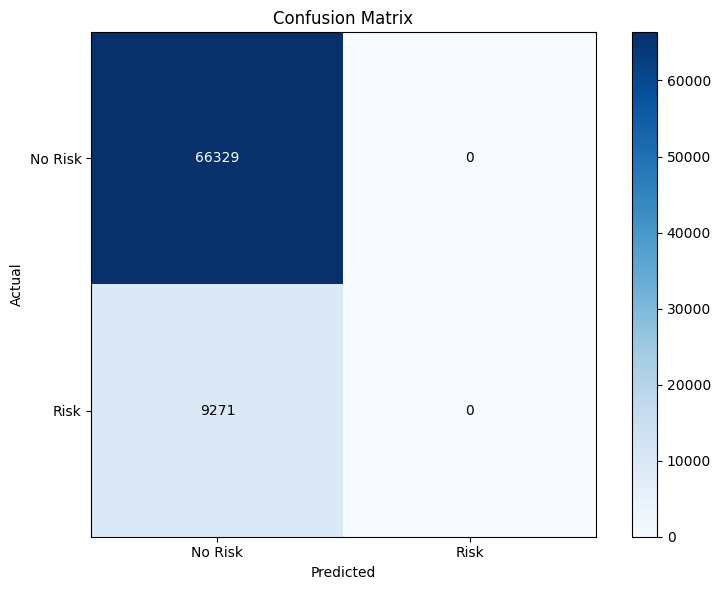

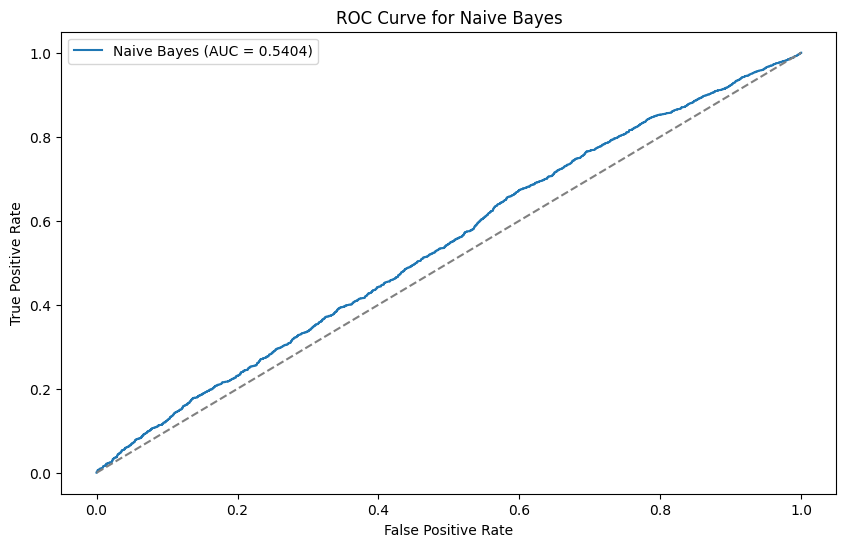

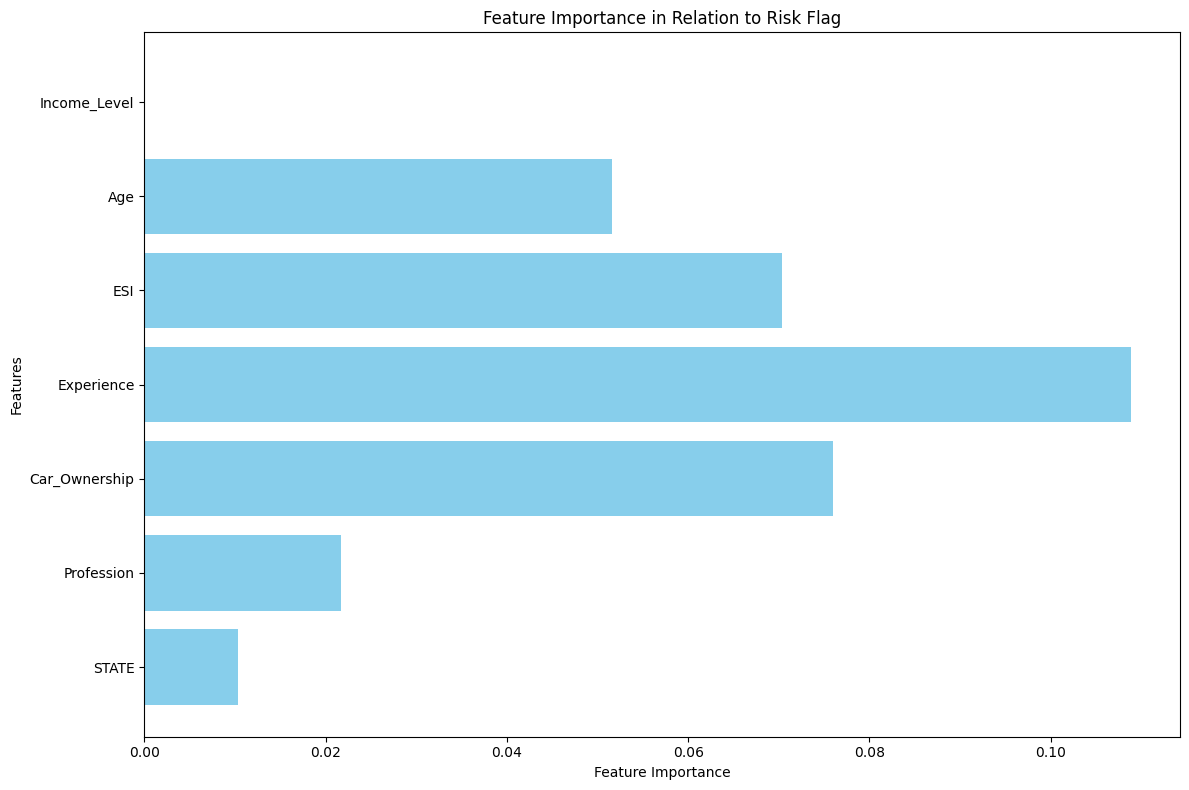

Top Features by Importance:
         Feature  Importance
3     Experience    0.108811
2  Car_Ownership    0.075946
4            ESI    0.070369
5            Age    0.051553
1     Profession    0.021675
0          STATE    0.010325
6   Income_Level    0.000000


In [19]:
# Iteration 3 - Naïve Bayes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('cleanLoanData.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Dataset Info:")
print(data.info())

# Combine STATE and Profession into single features
le_state = LabelEncoder()
le_profession = LabelEncoder()

data['STATE'] = le_state.fit_transform(data['STATE'])
data['Profession'] = le_profession.fit_transform(data['Profession'])

# Select key features
columns_to_keep = [
    'STATE', 'Profession', 'Car_Ownership', 'Experience', 'ESI', 'Age', 
    'Income_Level', 'Risk_Flag'
]
data = data[columns_to_keep]

# Ensure all features in X are numeric
X = data.drop('Risk_Flag', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert strings to NaN if present
X.fillna(0, inplace=True)  # Replace NaN values with 0

y = data['Risk_Flag']

# Train-test split with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train Naive Bayes
print("Training Naive Bayes...")
nb_model.fit(X_train, y_train)
print("Naive Bayes trained.")

# Predictions
nb_probs = nb_model.predict_proba(X_test)[:, 1]
nb_preds = nb_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, y_probs):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=1),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_probs)
    }
    return metrics

nb_metrics = evaluate_model(y_test, nb_preds, nb_probs)

# Print metrics
print("Naive Bayes Metrics:")
for metric, value in nb_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.yticks([0, 1], ['No Risk', 'Risk'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Annotate confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.tight_layout()
plt.show()

# ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(10, 6))
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.legend()
plt.show()

# Feature Analysis
feature_names = X.columns
feature_importances = abs(nb_model.theta_[1] - nb_model.theta_[0])  # Difference between means for each class

# Plot feature relationships
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Relation to Risk Flag")
plt.tight_layout()
plt.show()

# Summary Table of Features and Risk Flag Relationships
feature_analysis = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(feature_analysis.head(10))


Dataset Shape: (252000, 65)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 65 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Income                                252000 non-null  int64  
 1   Age                                   252000 non-null  int64  
 2   Experience                            252000 non-null  int64  
 3   Married.Single                        252000 non-null  int64  
 4   House_Ownership                       252000 non-null  int64  
 5   Car_Ownership                         252000 non-null  int64  
 6   Profession                            252000 non-null  object 
 7   STATE                                 252000 non-null  object 
 8   CURRENT_JOB_YRS                       252000 non-null  int64  
 9   CURRENT_HOUSE_YRS                     252000 non-null  int64  
 10  Risk_Flag                 

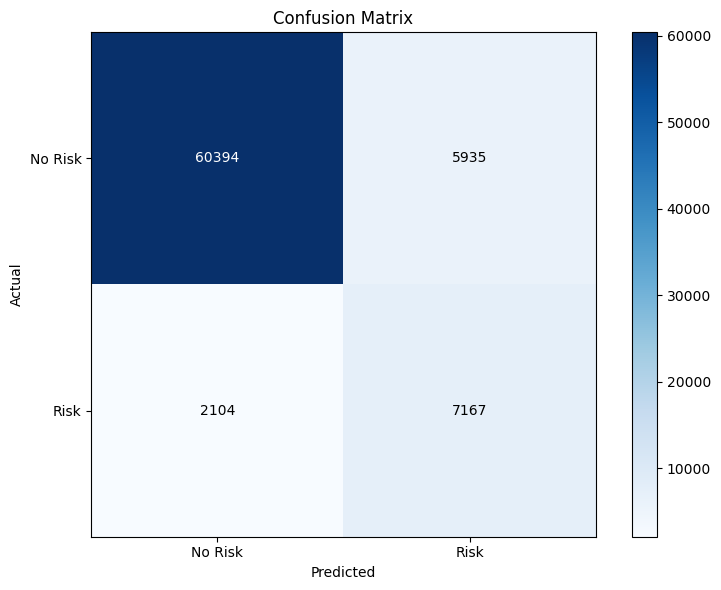

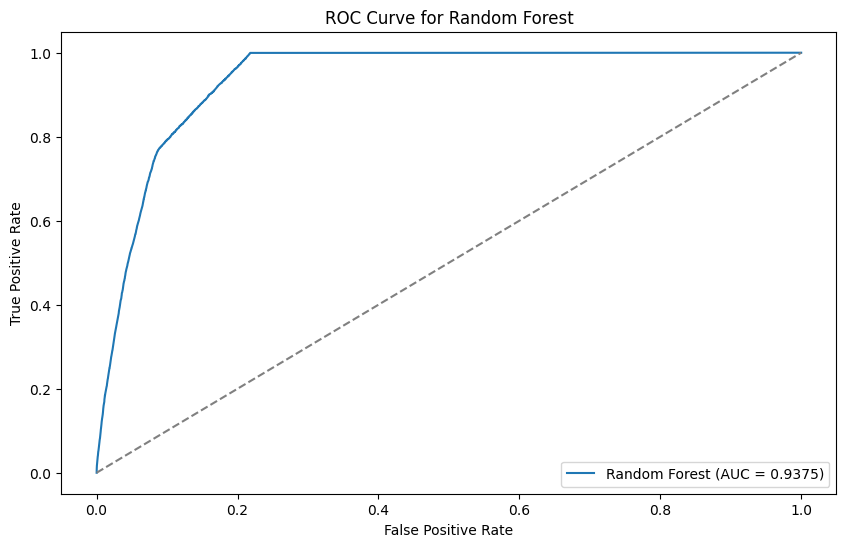

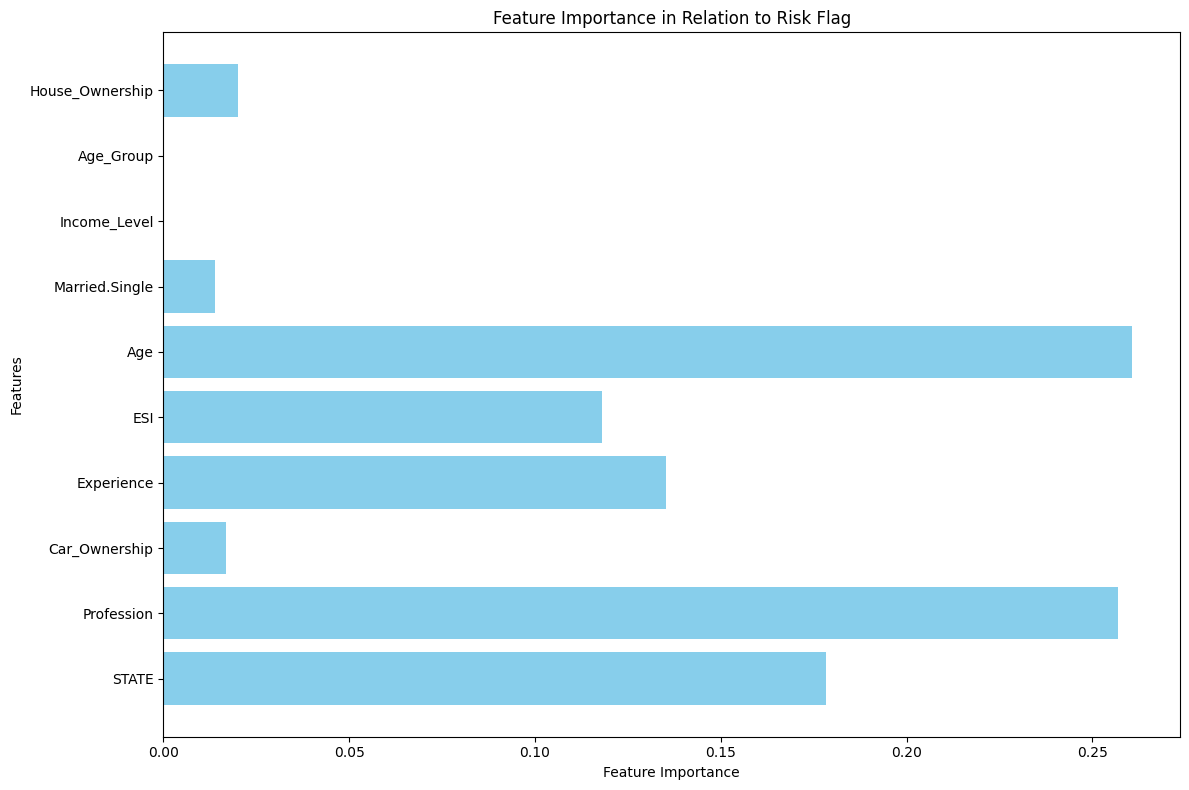

Top Features by Importance:
           Feature  Importance
5              Age    0.260550
1       Profession    0.256833
0            STATE    0.178283
3       Experience    0.135349
4              ESI    0.117982
9  House_Ownership    0.020207
2    Car_Ownership    0.016974
6   Married.Single    0.013822
7     Income_Level    0.000000
8        Age_Group    0.000000


In [20]:
# Iteration 1 - Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('cleanLoanData.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Dataset Info:")
print(data.info())

# Combine all STATE and Profession into single features
# Encoding STATE and Profession into numerical categories
le_state = LabelEncoder()
le_profession = LabelEncoder()

data['STATE'] = le_state.fit_transform(data['STATE'])
data['Profession'] = le_profession.fit_transform(data['Profession'])

# Retain relevant features along with Risk_Flag
columns_to_keep = [
    'STATE', 'Profession', 'Car_Ownership', 'Experience', 'ESI', 'Age', 
    'Married.Single', 'Income_Level', 'Age_Group', 'House_Ownership', 'Risk_Flag'
]
data = data[columns_to_keep]

# Ensure all features in X are numeric
X = data.drop('Risk_Flag', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert strings to NaN if present
X.fillna(0, inplace=True)  # Replace NaN values with 0

y = data['Risk_Flag']

# Train-test split with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100)

# Train Random Forest
print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print("Random Forest trained.")

# Predictions
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_preds = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, y_probs):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=1),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_probs)
    }
    return metrics

rf_metrics = evaluate_model(y_test, rf_preds, rf_probs)

# Print metrics
print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.yticks([0, 1], ['No Risk', 'Risk'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Annotate confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.tight_layout()
plt.show()

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

# Feature analysis
feature_names = X.columns
feature_importances = rf_model.feature_importances_

# Plot feature relationships
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Relation to Risk Flag")
plt.tight_layout()
plt.show()

# Summary table of features and Risk Flag relationships in numerical order
feature_analysis = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(feature_analysis.head(10))


Dataset Shape: (252000, 65)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 65 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Income                                252000 non-null  int64  
 1   Age                                   252000 non-null  int64  
 2   Experience                            252000 non-null  int64  
 3   Married.Single                        252000 non-null  int64  
 4   House_Ownership                       252000 non-null  int64  
 5   Car_Ownership                         252000 non-null  int64  
 6   Profession                            252000 non-null  object 
 7   STATE                                 252000 non-null  object 
 8   CURRENT_JOB_YRS                       252000 non-null  int64  
 9   CURRENT_HOUSE_YRS                     252000 non-null  int64  
 10  Risk_Flag                 

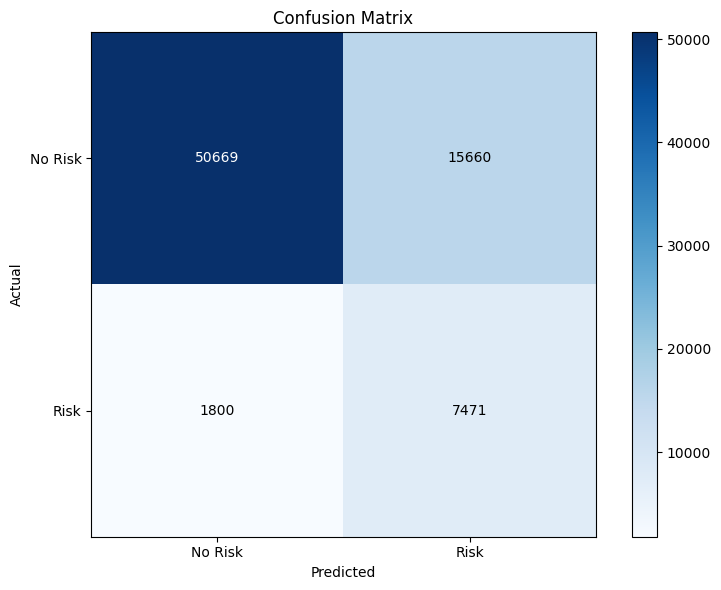

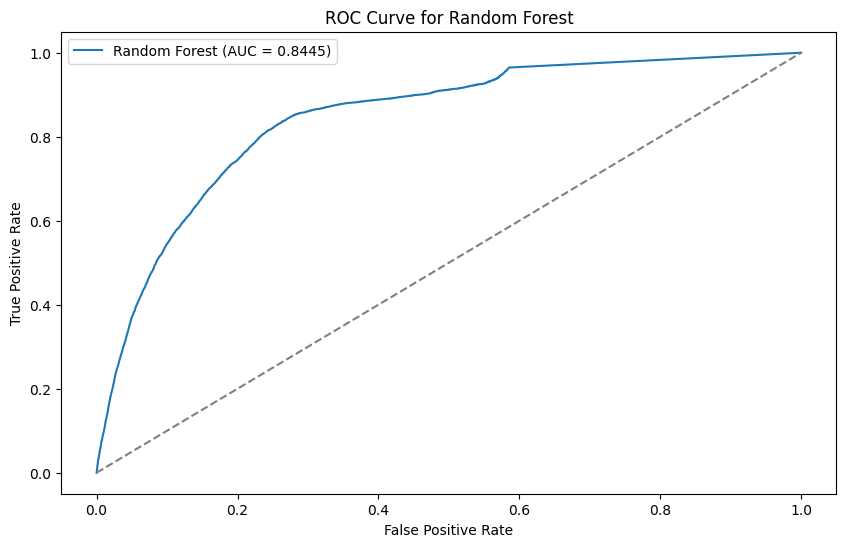

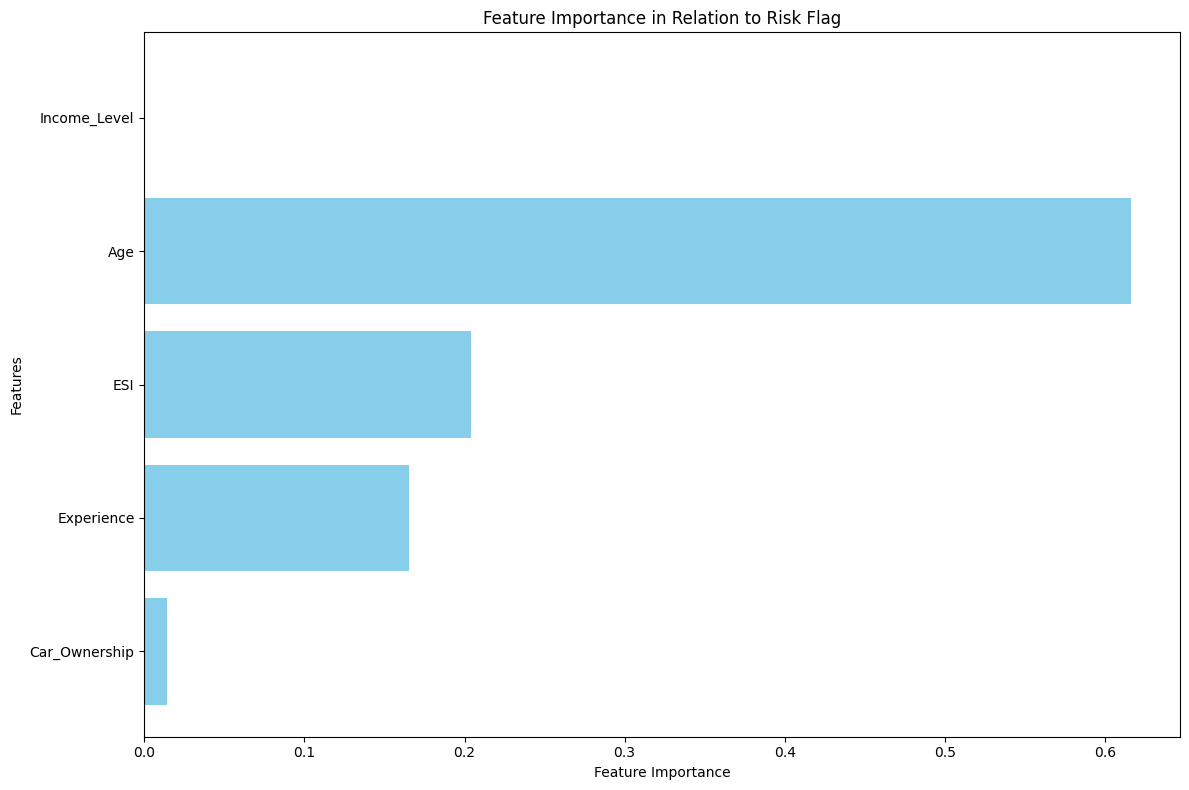

Top Features by Importance:
         Feature  Importance
3            Age    0.616063
2            ESI    0.204195
1     Experience    0.165319
0  Car_Ownership    0.014423
4   Income_Level    0.000000


In [21]:
# Iteration 2 - Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('cleanLoanData.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Dataset Info:")
print(data.info())

# Retain only numerical features along with Risk_Flag
columns_to_keep = [
    'Car_Ownership', 'Experience', 'ESI', 'Age', 'Income_Level', 'Risk_Flag'
]
data = data[columns_to_keep]

# Ensure all features in X are numeric
X = data.drop('Risk_Flag', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert strings to NaN if present
X.fillna(0, inplace=True)  # Replace NaN values with 0

y = data['Risk_Flag']

# Train-test split with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100)

# Train Random Forest
print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print("Random Forest trained.")

# Predictions
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_preds = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, y_probs):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=1),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_probs)
    }
    return metrics

rf_metrics = evaluate_model(y_test, rf_preds, rf_probs)

# Print metrics
print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.yticks([0, 1], ['No Risk', 'Risk'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Annotate confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.tight_layout()
plt.show()

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

# Feature Analysis
feature_names = X.columns
feature_importances = rf_model.feature_importances_

# Plot feature relationships
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Relation to Risk Flag")
plt.tight_layout()
plt.show()

# Summary Table of Features and Risk Flag Relationships
feature_analysis = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(feature_analysis.head(10))

Dataset Shape: (252000, 65)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 65 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Income                                252000 non-null  int64  
 1   Age                                   252000 non-null  int64  
 2   Experience                            252000 non-null  int64  
 3   Married.Single                        252000 non-null  int64  
 4   House_Ownership                       252000 non-null  int64  
 5   Car_Ownership                         252000 non-null  int64  
 6   Profession                            252000 non-null  object 
 7   STATE                                 252000 non-null  object 
 8   CURRENT_JOB_YRS                       252000 non-null  int64  
 9   CURRENT_HOUSE_YRS                     252000 non-null  int64  
 10  Risk_Flag                 

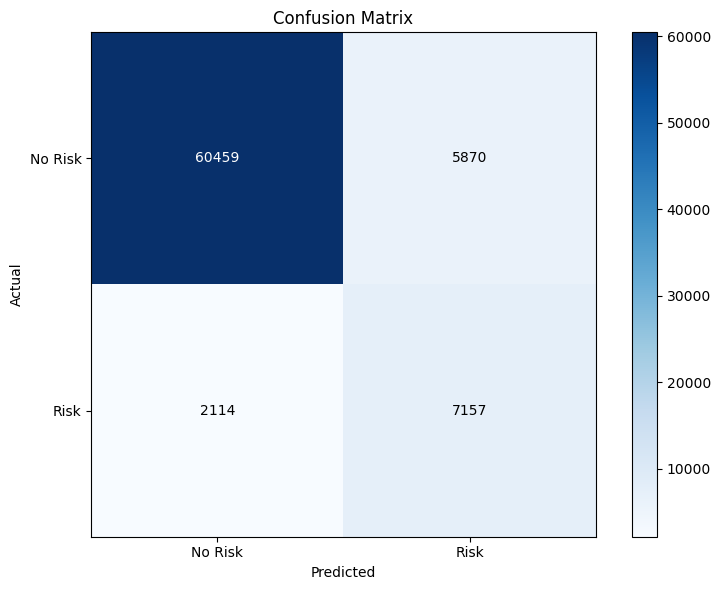

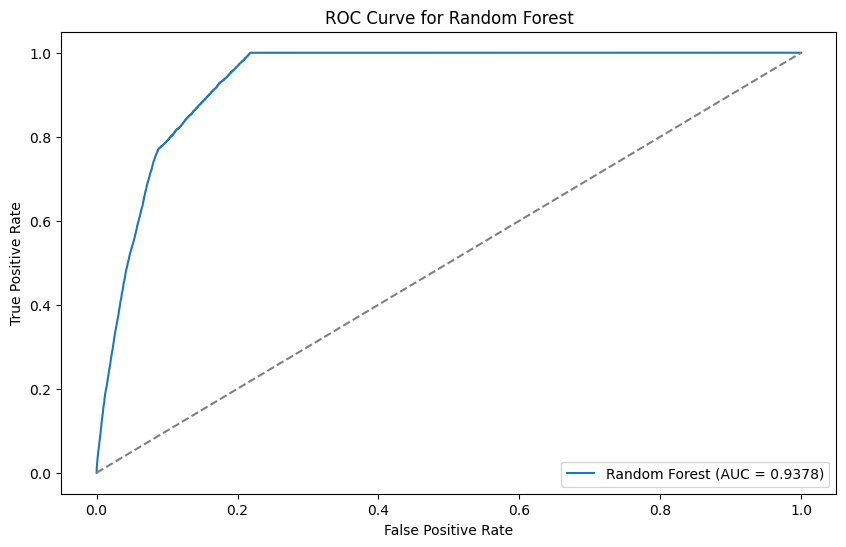

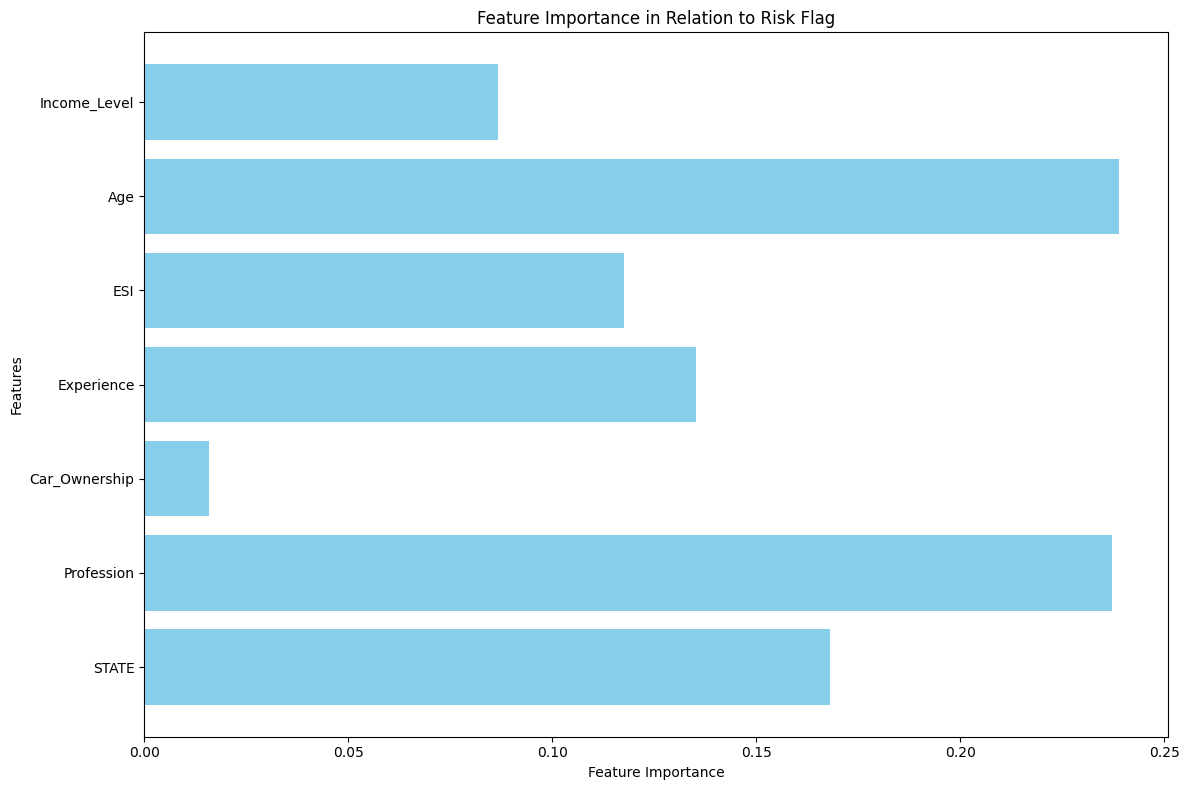

Top Features by Importance:
         Feature  Importance
5            Age    0.239035
1     Profession    0.237330
0          STATE    0.168025
3     Experience    0.135364
4            ESI    0.117612
6   Income_Level    0.086751
2  Car_Ownership    0.015883


In [24]:
# Iteration 3 - Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('cleanLoanData.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Dataset Info:")
print(data.info())

# Combine STATE and Profession into single features
le_state = LabelEncoder()
le_profession = LabelEncoder()

data['STATE'] = le_state.fit_transform(data['STATE'])
data['Profession'] = le_profession.fit_transform(data['Profession'])

# Ensure Income_Level is treated correctly in the dataset
# Map textual categories to numerical values for Income_Level
data['Income_Level'] = data['Income_Level'].map({
    'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5
}).fillna(0).astype(int)

# Select key features
columns_to_keep = [
    'STATE', 'Profession', 'Car_Ownership', 'Experience', 'ESI', 'Age', 
    'Income_Level', 'Risk_Flag'
]
data = data[columns_to_keep]

# Ensure all features in X are numeric
X = data.drop('Risk_Flag', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert strings to NaN if present
X.fillna(0, inplace=True)  # Replace NaN values with 0

y = data['Risk_Flag']

# Train-test split with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100)

# Train Random Forest
print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print("Random Forest trained.")

# Predictions
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_preds = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, y_probs):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=1),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_probs)
    }
    return metrics

rf_metrics = evaluate_model(y_test, rf_preds, rf_probs)

# Print metrics
print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.yticks([0, 1], ['No Risk', 'Risk'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Annotate confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.tight_layout()
plt.show()

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

# Feature Analysis
feature_names = X.columns
feature_importances = rf_model.feature_importances_

# Plot feature relationships
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Relation to Risk Flag")
plt.tight_layout()
plt.show()

# Summary Table of Features and Risk Flag Relationships
feature_analysis = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(feature_analysis.head(10))
